# Tarea 1


CC5113 - Aprendizaje Automático Bayesiano

Profesor: Pablo Guerrero

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

In [2]:
# se elimina la primera fila del archivo antes de cargar!
data = np.genfromtxt('data_out_mod.txt', delimiter=' ')
#x = data[:,0]
#y = data[:,1]

np.random.shuffle(data)
training, test = data[:375,:], data[375:,:]

#pdb.set_trace()
#True

### A continuación se grafica la data:

Text(0,0.5,'Y')

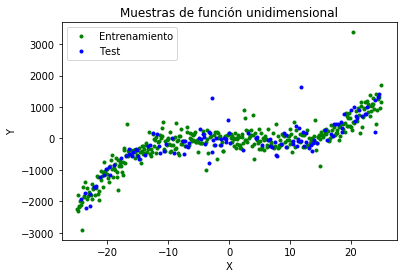

In [3]:
#mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.plot(training[:,0],training[:,1], 'g.')
plt.plot(test[:,0],test[:,1], 'b.')
plt.title("Muestras de función unidimensional")
plt.legend(["Entrenamiento", "Test"])
plt.xlabel("X")
plt.ylabel("Y")

# P1 Regresión Lineal

### Regresión lineal

Sabemos que para la regresión lineal regularizada, los parámetros $\theta$ (parámetros del modelo) tienen la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Para simplificar el problema usaremos un parámetro de regularización $\rho = 0$

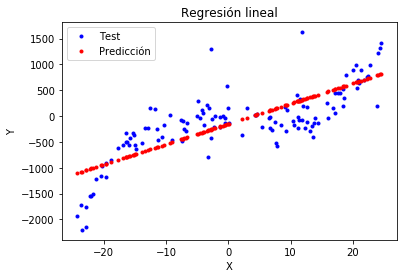

In [12]:
x_tilda = np.array([training[:,0], np.ones(len(training[:,0]))]).transpose()
y_reg = training[:,1]
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

plt.figure()
plt.plot(test[:,0],test[:,1], 'b.')
plt.title("Regresión lineal")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(
    test[:,0],
    recta(test[:,0], rho),
    'r.')
plt.legend(["Test", "Predicción"])

### Comparando con polyfit

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [5]:
print("Theta polyfit: ", np.polyfit(training[:,0],training[:,1], 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [  39.25635599 -151.48840006]
Theta formula:  [  39.25635599 -151.48840006]


### Error cuadrático 

In [6]:
def errorCuadratico(x, pred, labels):
    error2 = np.sum(np.power(np.absolute(np.subtract(labels, pred)), 2))
    
    return error2

print("El error cuadratico del train es: " + str(errorCuadratico(training[:,0],recta(training[:,0], rho), training[:,1])))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(test[:,0],recta(test[:,0], rho), test[:,1])))

El error cuadratico del train es: 76989778.35405156

El error cuadratico del test es: 23496602.58207634


# P2 Kernel Regression

### Kernel Polinomial

Dado que el kernel polinomial es una función lineal en los parámetros, podemos usar una formula análoga a la usada en la regresión lineal para calcular los patrámetros mediante inversión de matrices:
\begin{equation}
\theta = (\Phi{(X)}^{T}\Phi{(X)} + \rho I)^{-1} \Phi{(X)}^{T}Y
\end{equation}

En donde $\Phi$ es una base polinomial de grado $D$.

\begin{equation}
\Phi{(X)} = \begin{bmatrix}
           x_{1}^D & \ldots & x_{1} & 1\\
           x_{2}^D & \ldots &x_{2} & 1\\
           \vdots & \ldots &\vdots & \vdots \\
           x_{N}^D & \ldots &x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}


El error cuadratico del train es: 32132972.169858947

El error cuadratico del test es: 11043813.455735521


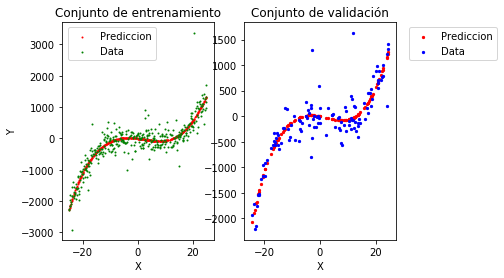

In [44]:
grado = 6

identity_size = grado + 1

x_tilda = np.array([training[:,0], np.ones(len(training[:,0]))]).transpose()
y_reg = training[:,1]

for grado in range(2, grado + 1):
    x_tilda = np.append(np.array(np.power(training[:,0],grado))[np.newaxis].transpose(), x_tilda, axis=1)

identidad = np.identity(identity_size)

def get_theta_pol(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def poly(x, rho): 
    theta = get_theta_pol(rho)
    #print("Theta polyfit: ", np.polyfit(training[:,0],y_reg, grado))
    #print("Theta formula: ", get_theta_pol(rho))
    
    p = np.poly1d(theta)
    return p(x)

#salida = recta(x_te, 0)
#pdb.set_trace()

rho = 0

f, figures = plt.subplots(1, 2)
figures[0].scatter(training[:,0],poly(training[:,0], rho), c ='r', s=1) 
figures[0].scatter(training[:,0],training[:,1], c='g', s=1)
figures[0].set_xlabel("X")
figures[0].set_ylabel("Y")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(test[:,0],poly(test[:,0], rho), c ='r', s=5) 
figures[1].scatter(test[:,0],test[:,1], c='b', s=5) 
figures[1].set_xlabel("X")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(1.05, 1))

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(training[:,0],poly(training[:,0], rho), training[:,1])))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(test[:,0],poly(test[:,0], rho), test[:,1])))

### Kernel Gaussiano


El error cuadratico del train es: 32613957.647850975

El error cuadratico del test es: 11349907.714104066


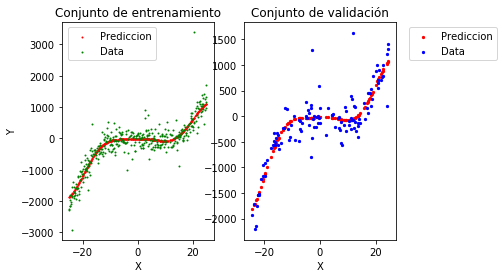

In [24]:
ker_regr = KernelRidge(kernel="rbf", gamma=0.0055)

x_train = training[:,0].reshape(-1, 1)
y_train = training[:,1].reshape(-1, 1)

#pdb.set_trace()

x_test = test[:,0].reshape(-1, 1)
y_test = test[:,1].reshape(-1, 1)

#entrenamiento
ker_regr.fit(x_train, y_train)

#prediccicones
ker_pred_cal_train = ker_regr.predict(x_train)
ker_pred_cal_test = ker_regr.predict(x_test)

f, figures = plt.subplots(1, 2)
figures[0].scatter(training[:,0],ker_pred_cal_train, c ='r', s=1) 
figures[0].scatter(training[:,0],training[:,1], c='g', s=1)
figures[0].set_xlabel("X")
figures[0].set_ylabel("Y")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(test[:,0],ker_pred_cal_test, c ='r', s=5) 
figures[1].scatter(test[:,0],test[:,1], c='b', s=5) 
figures[1].set_xlabel("X")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(1.05, 1))

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(x_train,ker_pred_cal_train, y_train)))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(x_test,ker_pred_cal_test, y_test)))

# P3 Multi-Layer Perceptron

In [106]:
red = MLPRegressor(hidden_layer_sizes=(23), solver='lbfgs')

red.fit(x_train, y_train)

/home/martin/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=23, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


El error cuadratico del train es: 30707348.19698507

El error cuadratico del test es: 10937319.79755308


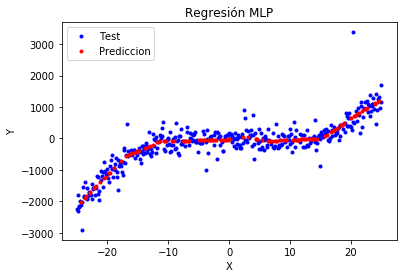

In [107]:
y_pred_train = red.predict(x_train)
y_pred_test = red.predict(x_test)

#pdb.set_trace()
plt.figure()
plt.plot(x_train,y_train, 'b.')
plt.title("Regresión MLP")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(
    x_test,
    y_pred_test,
    'r.')
plt.legend(["Test", "Prediccion"])

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(x_train,y_pred_train.reshape(-1, 1), y_train)))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(x_test,y_pred_test.reshape(-1, 1), y_test)))

## Discusión

Al graficar la data, como se observa en la primera figura, a priori parece que las muestras fueron extraidas de una función polinomial que posee dos puntos de inflexión en presencia de ruido. Se ve que existen $\textit{outliers}$, sin embargo no se procedió a removerlos para ver si los métodos a continuación podían llegar a resultados coherentes en presencia de éstos.

La regresión lineal (P1) fue la solución con el peor desempeño si comparamos el MSE del conjunto de validación (test). Vemos que la función creada por la regresión es una recta. Esta función puede ser útil en el caso que solo se desee predecir si la tendencia va en aumento o descenso.

En la regresión con kernel polinomial tenemos una función que se ajusta mucho mejor a los datos respecto a la regresión lineal. En particular se utilizó una base polinomial de grado 6, ya que se observó que si se seguía aumentando el grado, el test-error aumentaba (overfitting).

En la regresión con kernel gaussiano se tiene un MSE significativamente mejor que en la regresión lineal, pero tiene un desempeño ligeramente peor que el kernel polinomial.

Finalmente en la regresión con MLP se tiene que el óptimo se alcanzó usando solo 1 capa escondida, de lo contrario existía overfitting. Se llego a la cantidad de 23 neuronas en la capa escondida de forma heurística. El desempeño fue ligeramente mejor que usando kernel gaussiano.

De estas comparaciones se obtiene que el método que arrojó el menor MSE fue el kernel polinomial de grado 6.